In [2]:

from io import BytesIO
from PIL import Image
import requests
import ipyplot
 
from transformers import CLIPProcessor, CLIPModel
import torch

In [3]:


model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
     

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

C:\Users\PavanSomisetty\anaconda3\envs\chatai\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PavanSomisetty\.cache\huggingface\hub\models--openai--clip-vit-base-patch32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:

original_api = "https://pixabay.com/api/?key="
pixabay_api_key = "your api key"

In [5]:
#@title Enter the queries
semantic_search_phrase = "spiderman on the snow" #@param {type:"string"}
pixabay_search_keyword = "spiderman" #@param {type:"string"}
     

In [6]:

no_to_retrieve = 30
pixabay_api = original_api+pixabay_api_key+"&q="+pixabay_search_keyword.lower()+"&image_type=photo&safesearch=true&per_page="+str(no_to_retrieve)
response = requests.get(pixabay_api)
output = response.json()

all_images =[]
for each in output["hits"]:
    imageurl = each["webformatURL"]
    response = requests.get(imageurl)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    all_images.append(image)

print ("Total no of images retrived: ",len(all_images))


Total no of images retrived:  30


In [ ]:

ipyplot.plot_images(all_images,max_images=50,img_width=150)

In [8]:
# Obtain the text-image similarity scores
with torch.no_grad():
    inputs = processor(text=[semantic_search_phrase], 
                    images=all_images, return_tensors="pt", padding=True)
    outputs = model(**inputs)

In [9]:

logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

print(logits_per_image.shape, probs.shape)

torch.Size([30, 1]) torch.Size([30, 1])


In [10]:
# Filter the scores and return indices
values, indices = logits_per_image.squeeze().topk(3) # Top-3

top_images, top_scores = [], []

for score, index in zip(values, indices):
    top_images.append(all_images[int(index.numpy())])
    score = score.numpy().tolist()
    top_scores.append(round(score, 3))

Scores: [29.628, 29.347, 28.695]



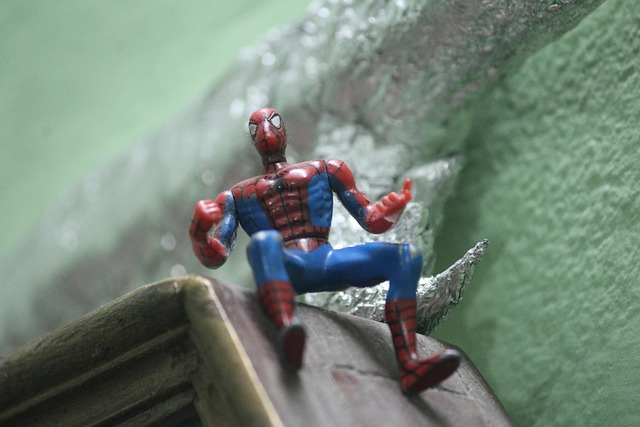
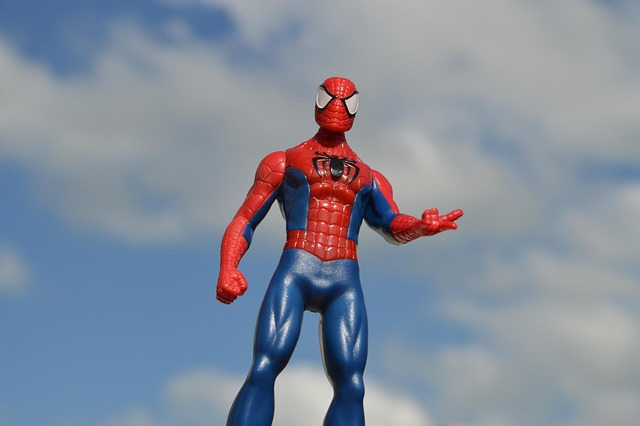
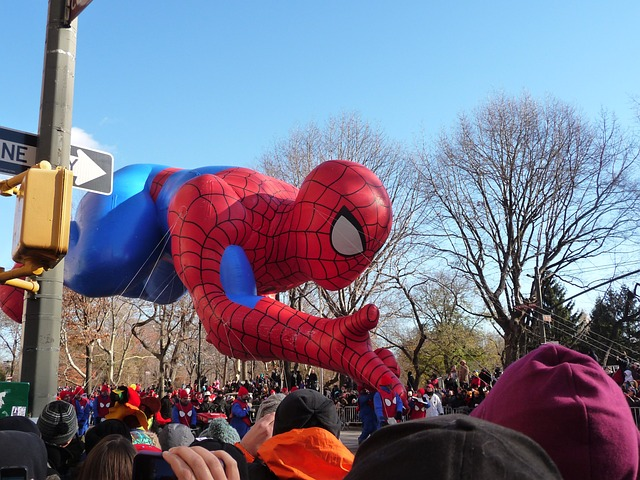


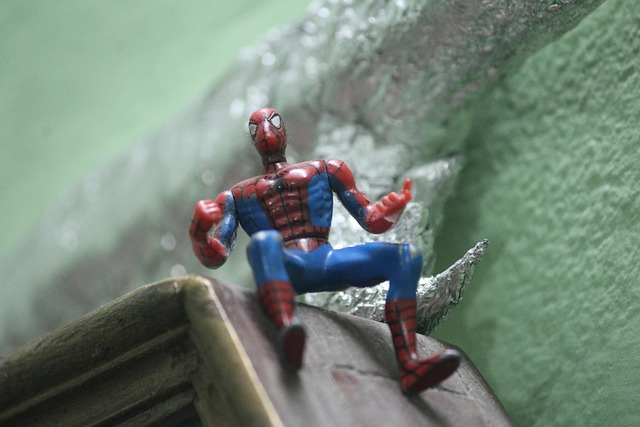
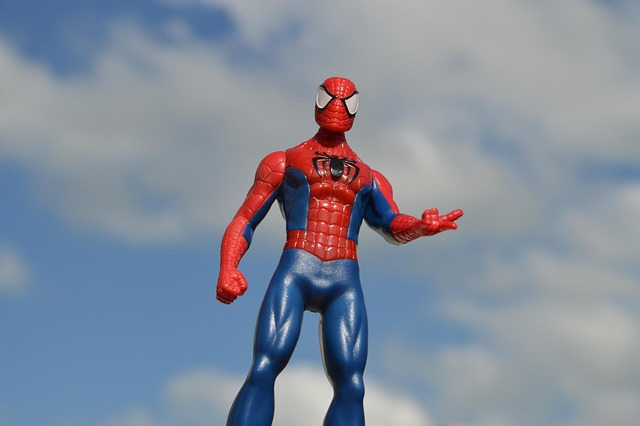
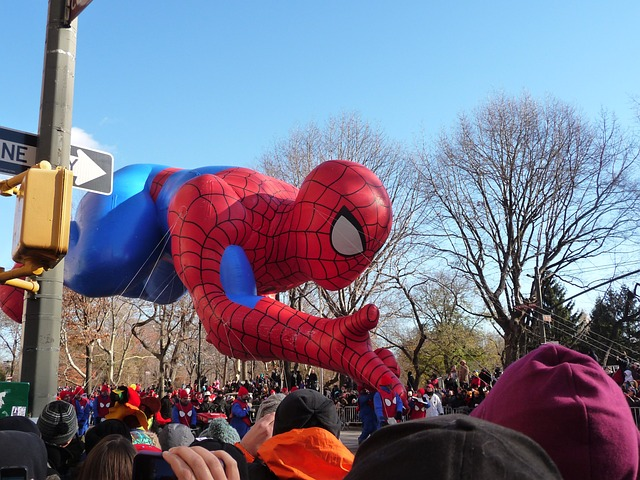

In [11]:

print (f"Scores: {top_scores}")
ipyplot.plot_images(top_images, img_width=300)